# 1. Project Overview

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\kymbe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# 2. Data Collection and Loading
* Load Data: Use Pandas to load a dataset (CSV, Excel, or database).
* Initial Check: Display the first few rows and basic information about the dataset, noting
column names, types, and missing values.
* Choose which columns or data to focus on and drop the rest.

In [3]:
tlc_data = pd.read_csv(r'Data_Sets\90_Day_Fiance_Data _Sheet1.csv')
tlc_data.head()

,Series,Season,Year Premiered,US-name,US-sex,US-age,US-city,US-state,US-latitude,US-longitude,...,Foreign-city,Foreign-country,Foreign-latitude,Foreign-longitude,Met,Met-detail,Support from Friends/Family,Wed,Still-together,Children
0,90 Day Fiance,1,2014,Russ,M,27,Oklahoma City,OK,35.46756,-97.5164,...,Bogota,Colombia,4.710989,-74.0721,travel,work,Y,Y,Y,1
1,90 Day Fiance,1,2014,Alan,M,29,Los Angeles,CA,34.05223,-118.2440,...,Goiania,Brazil,-16.686900,-49.2648,religious,Mormon mission,Y,Y,Y,2
2,90 Day Fiance,1,2014,Louis,M,33,Indianapolis,IN,39.76840,-86.1581,...,Ormoc,Philippines,11.038430,124.6193,online,dating service,N,Y,Y,2
3,90 Day Fiance,1,2014,Mike,M,31,Cleveland,OH,41.49932,-81.6944,...,Volgograd,Russia,48.708050,44.5133,online,language app,N,Y,Y,1
4,90 Day Fiance,2,2014,Chelsea,F,25,Galesburg,IL,40.94782,-90.3712,...,Managua,Nicaragua,12.114990,-86.2362,travel,volunteer,Y,Y,N,0


In [4]:
us_census_2023 = pd.read_csv(r'Data_Sets\ACSST5Y2023.S1201-2025-02-04T234224.csv')
us_census_2023.head(10)

,Label (Grouping),United States!!Total!!Estimate,United States!!Total!!Margin of Error,United States!!Now married (except separated)!!Estimate,United States!!Now married (except separated)!!Margin of Error,United States!!Widowed!!Estimate,United States!!Widowed!!Margin of Error,United States!!Divorced!!Estimate,United States!!Divorced!!Margin of Error,United States!!Separated!!Estimate,...,Wisconsin!!Now married (except separated)!!Estimate,Wisconsin!!Now married (except separated)!!Margin of Error,Wisconsin!!Widowed!!Estimate,Wisconsin!!Widowed!!Margin of Error,Wisconsin!!Divorced!!Estimate,Wisconsin!!Divorced!!Margin of Error,Wisconsin!!Separated!!Estimate,Wisconsin!!Separated!!Margin of Error,Wisconsin!!Never married!!Estimate,Wisconsin!!Never married!!Margin of Error
0,Population 15 years and over,"271,789,355","±6,688",47.9%,±0.1,5.6%,±0.1,10.7%,±0.1,1.7%,...,49.7%,±0.2,5.4%,±0.1,10.9%,±0.1,0.9%,±0.1,33.3%,±0.2
1,AGE AND SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Males 15 years and over,"133,528,389","±6,412",49.6%,±0.2,2.6%,±0.1,9.3%,±0.1,1.5%,...,50.5%,±0.3,2.6%,±0.1,9.9%,±0.1,0.7%,±0.1,36.4%,±0.2
3,15 to 19 years,"11,154,737","±6,970",1.0%,±0.1,0.0%,±0.1,0.0%,±0.1,0.1%,...,0.6%,±0.1,0.0%,±0.1,0.0%,±0.1,0.1%,±0.1,99.2%,±0.1
4,20 to 34 years,"34,027,921","±8,146",25.9%,±0.2,0.1%,±0.1,2.3%,±0.1,0.8%,...,24.9%,±0.4,0.0%,±0.1,1.8%,±0.1,0.4%,±0.1,72.9%,±0.5
5,35 to 44 years,"21,889,354","±6,321",60.4%,±0.4,0.4%,±0.1,8.7%,±0.1,2.0%,...,60.4%,±0.8,0.3%,±0.1,9.3%,±0.4,1.1%,±0.1,28.9%,±0.7
6,45 to 54 years,"20,376,268","±5,405",65.4%,±0.3,1.0%,±0.1,14.2%,±0.1,2.4%,...,63.7%,±0.6,0.8%,±0.1,16.4%,±0.5,1.2%,±0.1,18.0%,±0.4
7,55 to 64 years,"20,861,030","±3,260",65.7%,±0.3,2.5%,±0.1,16.6%,±0.1,2.1%,...,66.4%,±0.6,2.2%,±0.1,17.4%,±0.4,1.0%,±0.1,13.1%,±0.4
8,65 years and over,"25,219,079","±3,237",67.8%,±0.1,10.7%,±0.1,13.3%,±0.1,1.3%,...,69.9%,±0.4,9.9%,±0.3,12.7%,±0.3,0.6%,±0.1,6.9%,±0.3
9,Females 15 years and over,"138,260,966","±5,877",46.3%,±0.1,8.4%,±0.1,12.1%,±0.1,1.9%,...,48.9%,±0.3,8.1%,±0.1,11.8%,±0.2,1.0%,±0.1,30.2%,±0.2


In [5]:
niv_oct_24 = pd.read_csv(r'Data_Sets\OCTOBER_2024_NIV_Issuances_by_Nationality_and_Visa_Class.csv')
niv_oct_24.head()

,Nationality,Visa Class,Issuances
0,Afghanistan,B1/B2,153
1,Afghanistan,B2,1
2,Afghanistan,F1,10
3,Afghanistan,G4,15
4,Afghanistan,H4,1


# 3. Data Cleaning and Preparation


In [6]:
tlc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Series                       60 non-null     object 
 1   Season                       60 non-null     int64  
 2   Year Premiered               60 non-null     int64  
 3   US-name                      60 non-null     object 
 4   US-sex                       60 non-null     object 
 5   US-age                       60 non-null     int64  
 6   US-city                      60 non-null     object 
 7   US-state                     60 non-null     object 
 8   US-latitude                  60 non-null     float64
 9   US-longitude                 60 non-null     float64
 10  Foreign-name                 60 non-null     object 
 11  Foreign-sex                  60 non-null     object 
 12  Foreign-age                  60 non-null     int64  
 13  Foreign-city          

In [7]:
tlc_data["Couple_ID"] = range(1, len(tlc_data) + 1)
tlc_data.head(2)


,Series,Season,Year Premiered,US-name,US-sex,US-age,US-city,US-state,US-latitude,US-longitude,...,Foreign-country,Foreign-latitude,Foreign-longitude,Met,Met-detail,Support from Friends/Family,Wed,Still-together,Children,Couple_ID
0,90 Day Fiance,1,2014,Russ,M,27,Oklahoma City,OK,35.46756,-97.5164,...,Colombia,4.710989,-74.0721,travel,work,Y,Y,Y,1,1
1,90 Day Fiance,1,2014,Alan,M,29,Los Angeles,CA,34.05223,-118.2440,...,Brazil,-16.686900,-49.2648,religious,Mormon mission,Y,Y,Y,2,2


In [8]:
us_census_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 433 entries, Label (Grouping) to Wisconsin!!Never married!!Margin of Error
dtypes: object(433)
memory usage: 125.3+ KB


In [9]:
list(us_census_2023.columns)

['Label (Grouping)',
 'United States!!Total!!Estimate',
 'United States!!Total!!Margin of Error',
 'United States!!Now married (except separated)!!Estimate',
 'United States!!Now married (except separated)!!Margin of Error',
 'United States!!Widowed!!Estimate',
 'United States!!Widowed!!Margin of Error',
 'United States!!Divorced!!Estimate',
 'United States!!Divorced!!Margin of Error',
 'United States!!Separated!!Estimate',
 'United States!!Separated!!Margin of Error',
 'United States!!Never married!!Estimate',
 'United States!!Never married!!Margin of Error',
 'Alabama!!Total!!Estimate',
 'Alabama!!Total!!Margin of Error',
 'Alabama!!Now married (except separated)!!Estimate',
 'Alabama!!Now married (except separated)!!Margin of Error',
 'Alabama!!Widowed!!Estimate',
 'Alabama!!Widowed!!Margin of Error',
 'Alabama!!Divorced!!Estimate',
 'Alabama!!Divorced!!Margin of Error',
 'Alabama!!Separated!!Estimate',
 'Alabama!!Separated!!Margin of Error',
 'Alabama!!Never married!!Estimate',
 'A

In [10]:
def drop_margin_of_error_columns(us_census_2023):
    columns_to_drop = []
    for col in us_census_2023.columns:
        if 'Margin of Error' in col:
            columns_to_drop.append(col)
    us_census_2023 = us_census_2023.drop(columns=columns_to_drop)
    return us_census_2023

us_census_2023 = drop_margin_of_error_columns(us_census_2023)
print(us_census_2023)

                                     Label (Grouping)  \
0                        Population 15 years and over   
1                                         AGE AND SEX   
2                             Males 15 years and over   
3                                      15 to 19 years   
4                                      20 to 34 years   
5                                      35 to 44 years   
6                                      45 to 54 years   
7                                      55 to 64 years   
8                                   65 years and over   
9                           Females 15 years and over   
10                                     15 to 19 years   
11                                     20 to 34 years   
12                                     35 to 44 years   
13                                     45 to 54 years   
14                                     55 to 64 years   
15                                  65 years and over   
16                       Popula

In [11]:
niv_oct_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nationality  3804 non-null   object
 1   Visa Class   3802 non-null   object
 2   Issuances    3803 non-null   object
dtypes: object(3)
memory usage: 89.3+ KB


In [12]:
niv_oct_24['Visa Class'].value_counts()

Visa Class
B1/B2    200
F1       173
A2       172
J1       169
G4       157
        ... 
T4         1
M2         1
U5         1
U1         1
E2C        1
Name: count, Length: 68, dtype: int64

# 4. Exploratory Data Analysis (EDA)


### Analyzing 90 Day Fiance Couples Outcomes 
Number of total couples from seasons 1-10 of '90 Day Fiance' and out of the total couples, how many did get married on their season and how many are still together as of current Jan 2025 sources. 

In [ ]:
#Define a function analyze_couples_outcomes
#the DataFrame containing 90 Day Fiancé data.
#Data Preparation
#Ensure the DataFrame has relevant columns:
#couple_id (unique identifier for each couple)
#wed (boolean or categorical: Yes/No)
#still-together (boolean or categorical: Yes/No)
#Count Total Couples
#Get the total number of couples:
#Count Married Couples
#Filter rows where wed == 'Yes' or True.
#Count the number of married couples:
#Count Couples Still Together
#Filter rows where still_together == 'Yes' or True.
#Count the number of couples still-together:
#Return Results
#Return a dictionary with:
#Total couples
#Number of married couples
#Number of couples still-together
#Function Call (Optional)
#Call the function with your DataFrame and print results:
#results = analyze_couples_outcomes(tlc_data)
#print(results)

def analyze_couples_outcomes(tlc_data):

    # Count total couples
    total_couples = len(tlc_data['Couple_ID'].unique())

    # Count couples that got married
    married_couples = tlc_data[tlc_data['Wed'] == 'Y']
    num_married_couples = len(married_couples['Couple_ID'].unique())

    # Count couples still together
    still_together_couples = tlc_data[tlc_data['Still-together'] == 'Y']
    num_still_together = len(still_together_couples['Couple_ID'].unique())

        # Calculate percentages
    percent_married = (num_married_couples / total_couples) * 100 if total_couples > 0 else 0
    percent_still_together = (num_still_together / total_couples) * 100 if total_couples > 0 else 0

    # Return results as a dictionary
    results = {
        'Total Couples': total_couples,
        'Married Couples': num_married_couples,
        'Couples Still Together': num_still_together,
        'Percentage Married': percent_married,
        'Percentage Still Together': percent_still_together
    }

    return results
analyze_couples_outcomes(tlc_data)
    



{'Total Couples': 60,
 'Married Couples': 56,
 'Couples Still Together': 38,
 'Percentage Married': 93.33333333333333,
 'Percentage Still Together': 63.33333333333333}

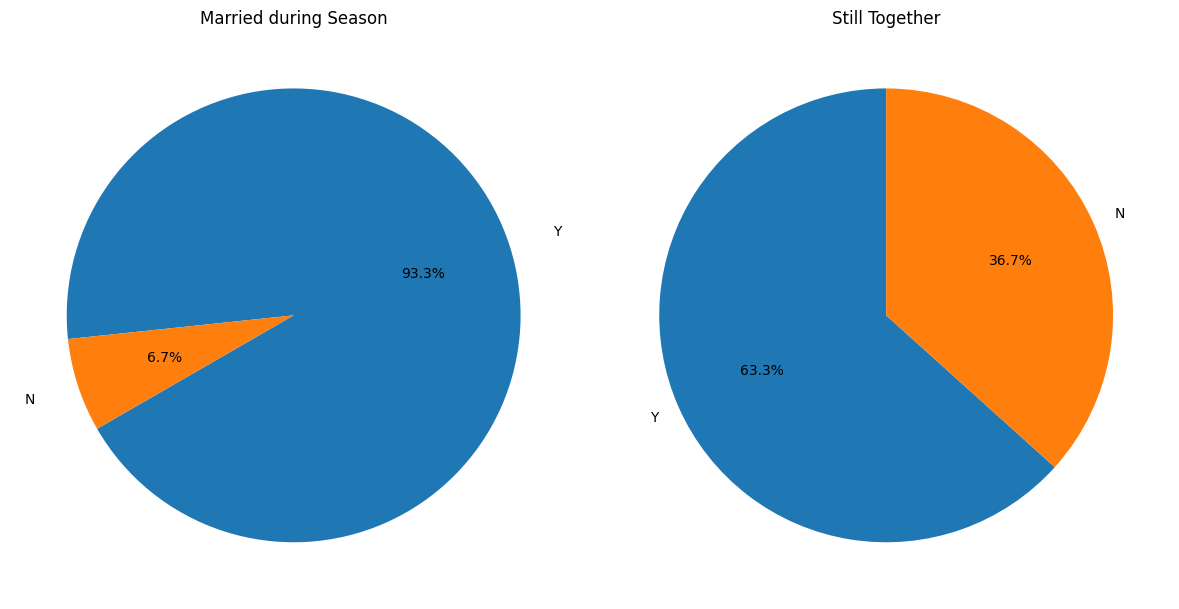

In [14]:
# Count the values in 'wed' and ''
wed_counts = tlc_data['Wed'].value_counts()
still_together_counts = tlc_data['Still-together'].value_counts()

    # Define the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 'type' 
axes[0].pie(wed_counts, labels=wed_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
axes[0].set_title('Married during Season')

    # Plot for 'level'
axes[1].pie(still_together_counts, labels=still_together_counts.index, autopct='%1.1f%%', startangle=90, 
                labeldistance=1.1)  
axes[1].set_title('Still Together')

plt.tight_layout()
plt.show()

93% did get married by the end of their season, 63% are still together as of Jan 2025. How does this compare to US and state averages?

### Visualizing the ways in each couple met

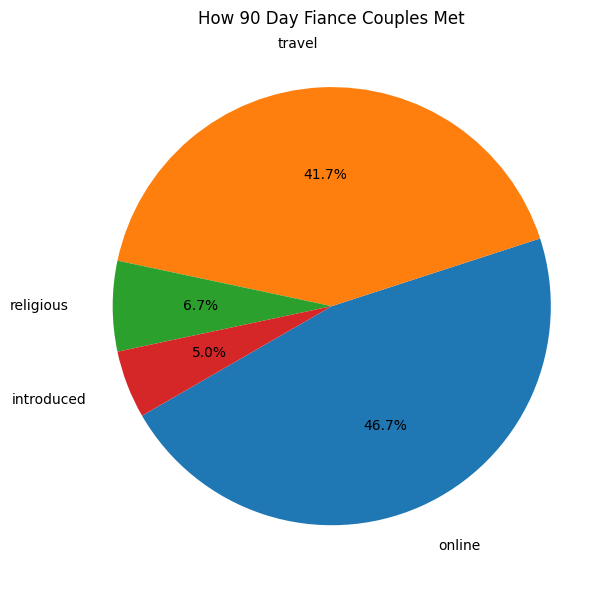

In [ ]:
# create a graph of how they met 
#Define a function plot_how_couples_met
#tlc_data is the DataFrame containing 90 Day Fiancé data.
#Data Preparation
#Ensure the DataFrame has a column named how_met (or similar) that describes how each couple met (e.g., online, vacation, mutual friends).
#Check for missing or null values in the how_met column and handle them:
#Replace nulls with 'Unknown' or drop rows with missing data if appropriate.
#Data Aggregation
#Count the occurrences of each unique value in the how_met column:
#Plotting the Pie Chart
#Use matplotlib.pyplot to create the pie chart:
#Add a title to the pie chart:
#plt.title('How 90 Day Fiancé Couples Met')
#Display the Chart
#Ensure the chart is displayed properly:
#plt.axis('equal') to keep the pie chart circular.
#plt.show() to render the chart.
#Function Call (Optional)
#Call the function with your DataFrame:
#plot_how_couples_met


def plot_how_couples_met(tlc_data):

    # Count occurrences of each method
    how_met_counts = tlc_data['Met'].value_counts()

       # Define the plot
    fig, axes = plt.subplots(1, figsize=(12, 6))

    # Plot for 'type' 
    axes.pie(how_met_counts, labels=how_met_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
    axes.set_title('How 90 Day Fiance Couples Met')

    # Plot the pie chart
    plt.tight_layout()
    plt.show()

plot_how_couples_met(tlc_data)





The most common way couples met were online, closely followed up either partner of the couple traveling and met in person during a travel, whether for work or vacation. 

### Does support of family and friends on the show influence if the couples got married and are still together?

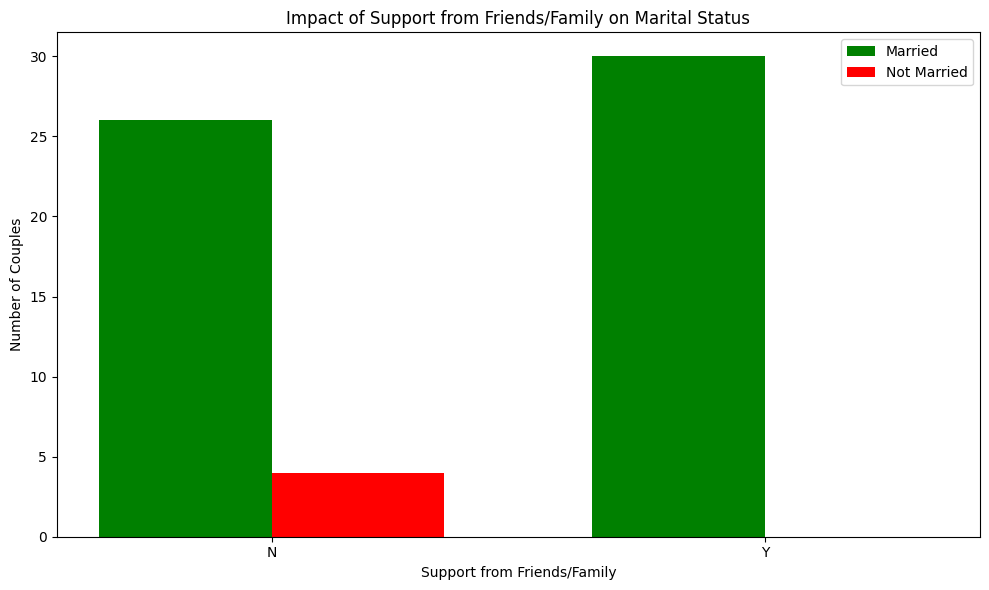

In [ ]:
#Does having support of friends and family influence if they are still together? 
#Define a function plot_support_vs_marriage
#Data Aggregation
#Group the data by support and wed.
#Plotting the Split Bar Graph
#Use matplotlib.pyplot to create the grouped bar chart:
#Define the position of bars using numpy.arange() for side-by-side bars.
#Plot bars for married == 'Yes' and not married == 'No'.
#Set different colors for each marital status.
#Customize the Graph
#Add labels for axes:
#X-axis: 'Support from Friends/Family'
#Y-axis: 'Number of Couples'
#Add a legend for marital status:
#'Married' and 'Not Married'
#Add a title to the graph:
#'Impact of Support from Friends/Family on Marital Status'
#Display the Graph
#Use plt.show() to render the graph.
#Function Call (Optional)
#Call the function with your DataFrame:
#plot_support_vs_marriage

def plot_support_vs_marriage(tlc_data):

    # Group data by support and marital status
    grouped_data = tlc_data.groupby(['Support from Friends/Family', 'Wed']).size().unstack(fill_value=0)

    # Plotting the split bar graph
    labels = grouped_data.index
    married_counts = grouped_data.get('Y', pd.Series([0]*len(labels)))
    not_married_counts = grouped_data.get('N', pd.Series([0]*len(labels)))

    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, married_counts, width, label='Married', color='green')
    bars2 = ax.bar(x + width/2, not_married_counts, width, label='Not Married', color='red')

    # Adding labels and title
    ax.set_xlabel('Support from Friends/Family')
    ax.set_ylabel('Number of Couples')
    ax.set_title('Impact of Support from Friends/Family on Marital Status')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_support_vs_marriage(tlc_data)



100% of couples with supportive family and friends in the series, did get married by the end of their season. If they did not have support from family or friends on their season, a large majority did still get married. It does not appear that support on the show has much of an effect on whether the couples got married or not. 

### How much does the US partner's gender have influencer in being together still?
How many that are still together where the US partner is male vs the US partner is female?

In [ ]:
# % of US spouse being male or female influence? 
#Define a function calculate_us_partner_still_together_percentage(df_90df)
#Filter the DataFrame for rows where 'still_together' == 'Yes'.
#Calculate Counts
#Count the total number of US partners who are male.
#Count the total number of US partners who are female.
#Count the number of US partners who are male and still together.
#Count the number of US partners who are female and still together.
#Calculate Percentages
#For male US partners:
#(Number of male US partners still together / Total male US partners) * 100
#For female US partners:
#(Number of female US partners still together / Total female US partners) * 100
#Return Results
#Return a dictionary with the percentages:
#'Male US Partners Still Together (%)'
#'Female US Partners Still Together (%)'
#Function Call (Optional)
#Call the function with your DataFrame:
#calculate_us_partner_still_together_percentage

def calculate_us_partner_still_together_percentage(tlc_data):

    # Filter for US partners who are still together
    still_together_df = tlc_data[tlc_data['Still-together'] == 'Y']

    # Total US partners by gender
    total_male_us_partners = len(tlc_data[tlc_data['US-sex'] == 'M'])
    total_female_us_partners = len(tlc_data[tlc_data['US-sex'] == 'F'])

    # US partners still together by gender
    male_still_together = len(still_together_df[still_together_df['US-sex'] == 'M'])
    female_still_together = len(still_together_df[still_together_df['US-sex'] == 'F'])

    # Calculate percentages
    male_percentage = (male_still_together / total_male_us_partners) * 100 if total_male_us_partners > 0 else 0
    female_percentage = (female_still_together / total_female_us_partners) * 100 if total_female_us_partners > 0 else 0

    # Return results as a dictionary
    results = {
        'Male US Partners Still Together (%)': male_percentage,
        'Female US Partners Still Together (%)': female_percentage
    }

    return results
calculate_us_partner_still_together_percentage(tlc_data)



{'Male US Partners Still Together (%)': 71.42857142857143,
 'Female US Partners Still Together (%)': 54.166666666666664}

If the US partner is male they were more likely to stay together, than if the US partner is female. I'd like to see how this compares to US census. 

### Does age of the couples influence if they are still together?

In [ ]:
#Does age influence if they are still together?
def group_by_age_and_sex(tlc_data):

    # Define age categories
    age_bins = [15, 19, 34, 44, 54, 64, np.inf]
    age_labels = ['15-19', '20-34', '35-44', '45-54', '55-64', '65+']

    # Convert 'US-age' to numeric and categorize
    tlc_data['age_group'] = pd.cut(pd.to_numeric(tlc_data['US-age'], errors='coerce'), bins=age_bins, labels=age_labels, right=True)

    # Group by age categories and 'US-sex' and count occurrences
    grouped_data = tlc_data.groupby(['age_group', 'US-sex']).size().reset_index(name='count')
    
    # Drop rows where count is 0
    grouped_data = grouped_data[grouped_data['count'] > 0]
    
    return grouped_data

group_by_age_and_sex(tlc_data)


C:\Users\kymbe\AppData\Local\Temp\ipykernel_15772\3527543717.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = tlc_data.groupby(['age_group', 'US-sex']).size().reset_index(name='count')


,age_group,US-sex,count
0,15-19,F,1
3,20-34,F,15
4,20-34,M,23
6,35-44,F,4
7,35-44,M,8
9,45-54,F,4
10,45-54,M,3
11,45-54,TF,1
13,55-64,M,1


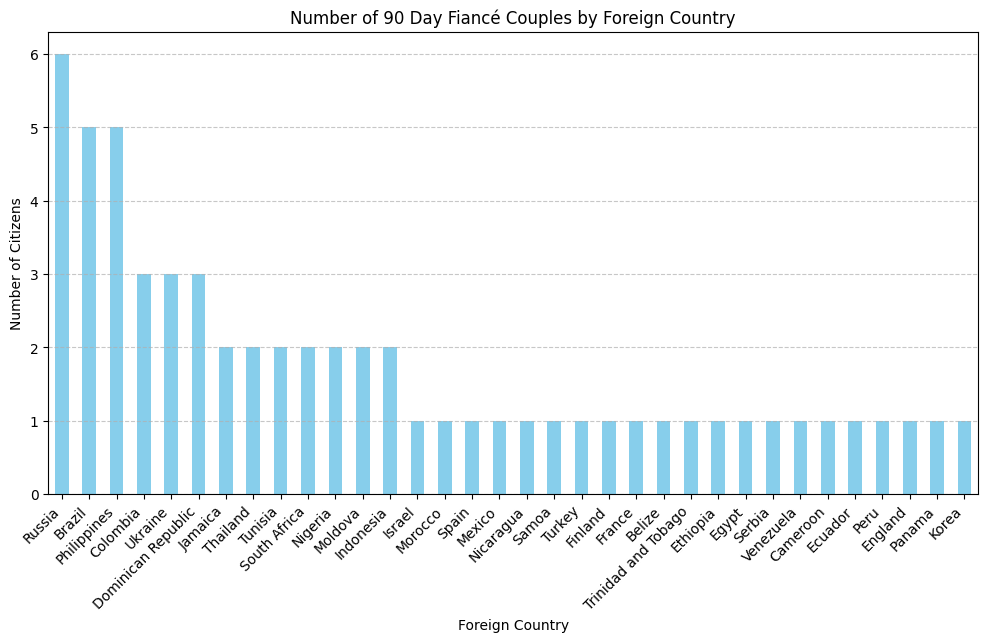

In [ ]:
# breakdown of countries represented in 90 Day Fiance
def plot_foreign_countries(tlc_data):
    
    # Count occurrences of each foreign country
    country_counts = tlc_data['Foreign-country'].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar', color='skyblue')

    # Formatting the plot
    plt.xlabel('Foreign Country')
    plt.ylabel('Number of Citizens')
    plt.title('Number of 90 Day Fiancé Couples by Foreign Country')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

plot_foreign_countries(tlc_data)

The country most represented in the series is Russia, with 6 citizens, followed by Brazil and Philippines with 5 citizens. How does this compare to K1 petitions?

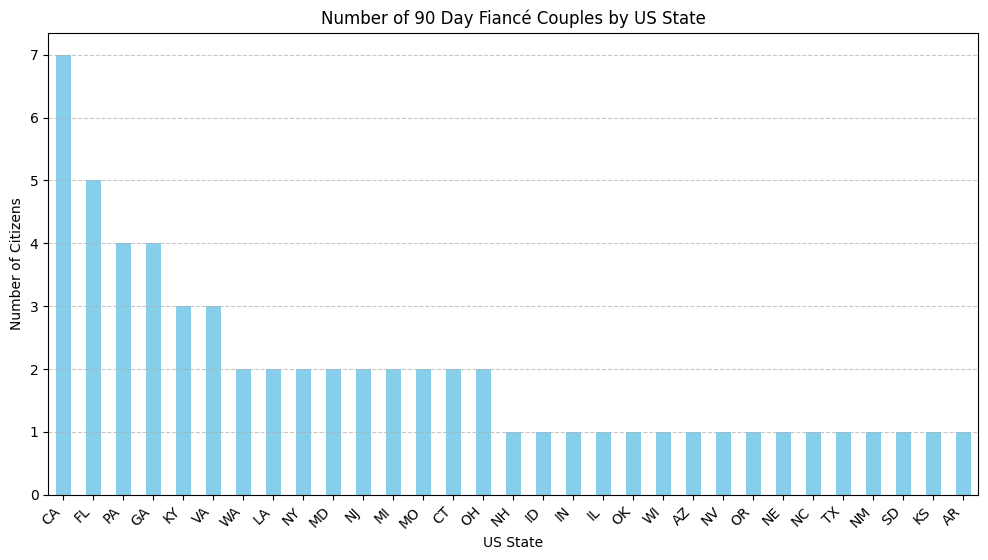

In [ ]:
# breakdown of states the US spouse represents
def plot_us_states(tlc_data):
    
    # Count occurrences of each us state
    state_counts = tlc_data['US-state'].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    state_counts.plot(kind='bar', color='skyblue')

    # Formatting the plot
    plt.xlabel('US State')
    plt.ylabel('Number of Citizens')
    plt.title('Number of 90 Day Fiancé Couples by US State')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

plot_us_states(tlc_data)

KY has had 3 couples represented in the series. 

In [22]:
print(us_census_2023.index.unique())

RangeIndex(start=0, stop=37, step=1)


In [45]:
#write a function to get the percentage of US married, widowed, divorced and separated compared to the total
def get_us_marital_status_percentage(us_census_2023):
    
    # Identify relevant column name patterns
    married_col = f"United States!!Now married (except separated)!!Estimate"
    widowed_col = f"United States!!Widowed!!Estimate"
    divorced_col = f"United States!!Divorced!!Estimate"
    separated_col = f"United States!!Separated!!Estimate"
    population_col = "Population 15 years and over"  # General population column


    # Extract population (removing commas and converting to int)
    total_population_row = us_census_2023[us_census_2023["Label (Grouping)"] == population_col]
    if total_population_row.empty:
        return "Total population data not found."

    total_population = total_population_row["United States!!Total!!Estimate"].values[0]
    total_population = int(total_population.replace(",", "")) if isinstance(total_population, str) else total_population

    if total_population == 0:
        return f"Total population is zero, cannot compute percentages."

    # Extract marital status percentages
    def get_percentage(col):
        val = us_census_2023[us_census_2023["Label (Grouping)"] == population_col][col].values[0]
        return float(val.replace("%", "")) if isinstance(val, str) and "%" in val else float(val)

    marital_data = {
        "Married": get_percentage(married_col),
        "Widowed": get_percentage(widowed_col),
        "Divorced": get_percentage(divorced_col),
        "Separated": get_percentage(separated_col),
    }

    return marital_data


get_us_marital_status_percentage(us_census_2023)

{'Married': 47.9, 'Widowed': 5.6, 'Divorced': 10.7, 'Separated': 1.7}

90 Day Fiance couples are statistically more likely to stay married than the total US population in 2023. Only 47.9% of the total US population over the age of 15 were married, but 63% of the couples in TLC's 90 Day Fiance were still married in 2023. However, while the divorced population in the US in 2023 was about 11%, around 30% of the couples in the series have gotten divorced throughout time. 

In [38]:
#write a function that a user could enter a state in the united states (written in upper or lower case) and get the percentage of married, widowed, divorced and separated compared to the total of that state 
def get_marital_status_percentage(us_census_2023, state):
    state = state.strip().title() 
    # Identify relevant column name patterns
    married_col = f"{state}!!Now married (except separated)!!Estimate"
    widowed_col = f"{state}!!Widowed!!Estimate"
    divorced_col = f"{state}!!Divorced!!Estimate"
    separated_col = f"{state}!!Separated!!Estimate"
    population_col = "Population 15 years and over"  # General population column

    # Check if state columns exist
    if married_col not in us_census_2023.columns:
        return f"State '{state}' not found in the dataset."

    # Extract population (removing commas and converting to int)
    total_population_row = us_census_2023[us_census_2023["Label (Grouping)"] == population_col]
    if total_population_row.empty:
        return "Total population data not found."

    total_population = total_population_row[state + "!!Total!!Estimate"].values[0]
    total_population = int(total_population.replace(",", "")) if isinstance(total_population, str) else total_population

    if total_population == 0:
        return f"Total population for '{state}' is zero, cannot compute percentages."

    # Extract marital status percentages
    def get_percentage(col):
        val = us_census_2023[us_census_2023["Label (Grouping)"] == population_col][col].values[0]
        return float(val.replace("%", "")) if isinstance(val, str) and "%" in val else float(val)

    marital_data = {
        "Married": get_percentage(married_col),
        "Widowed": get_percentage(widowed_col),
        "Divorced": get_percentage(divorced_col),
        "Separated": get_percentage(separated_col),
    }

    return marital_data


get_marital_status_percentage(us_census_2023, input("Please select an US state: ."))

"State 'Wyoming' not found in the dataset."

In [ ]:
#write a function that compares state statistics to the 90 day couple(s) Still together Y or N

In [ ]:
# write a function that counts the number K1 of 'Issuances' by 'Nationality' and 'Visa Class'
def count_k1_issuances(niv_oct_24):

    niv_oct_24_k1 = niv_oct_24[niv_oct_24['Visa Class'] == 'K1']  # Filter for K1 visas
    return niv_oct_24_k1.groupby('Nationality', as_index=False)['Issuances'].sum()
count_k1_issuances(niv_oct_24)


,Nationality,Issuances
0,*Non-Nationality Based Issuances,4
1,Afghanistan,9
2,Albania,22
3,Algeria,13
4,Angola,2
...,...,...
140,Venezuela,18
141,Vietnam,171
142,Yemen,11
143,Zambia,12


In [ ]:
# create a graph of country issuances of K1 visa

In [ ]:
#write a function that compares foreign country in 90 Day to the K1 petitions in nonimmigrant visa